In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('E:/python/projects/realweb/summer_camp_data.csv')
data.head(5)

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0


In [2]:
data.groupby(by='source', axis=0).sum().sort_values(by='revenue', axis=0, ascending=False).head(5)

,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
source,,,,,,,
yandex,9052209,2437760,19841510,3965592,3164637,377626,4.672993e+08
google,9386392,2497758,19211270,3840698,3157993,388169,4.563442e+08
(direct),2236423,883431,3886140,772914,618273,197467,2.383551e+08
admitad,1582266,475415,2063860,412450,448998,55397,6.573886e+07
eLama,318592,102981,697580,139348,108616,14488,1.643239e+07


a. Какой рекламный канал принёс больше всего дохода за всё время?
Ответ: yandex

In [3]:
data.sort_values(by='date')

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
25155,2020-01-01,newsletter,email,Не определено,Мобайл,no,no,5,4,0,0,0,0,0.0
26191,2020-01-01,cityads,cpa,Не определено,Десктоп,no,no,2,2,0,0,0,0,0.0
43336,2020-01-01,yandex,cpc,Доставка есть,Десктоп,yes,yes,27,3,80,16,9,3,3204.0
26247,2020-01-01,bing,organic,Не определено,Десктоп,no,no,3,2,0,0,0,0,0.0
21388,2020-01-01,eLama,cpc,Не определено,Мобайл,no,no,28,27,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9462,2020-09-30,yandex,organic,Не определено,Мобайл,yes,no,3389,469,3310,662,1024,40,43998.0
9463,2020-09-30,google,organic,Не определено,Мобайл,no,yes,385,29,340,68,54,2,1585.0
31910,2020-09-30,co-promo,email,Не определено,Десктоп,yes,yes,5,1,20,4,3,1,1806.0
44425,2020-09-30,eLama,cpc,Доставка есть,Мобайл,no,no,51,4,90,18,16,3,2425.0


In [4]:
def map_date(row):
    if row['date'] < '2020-03-16':
        row['date'] = 0
    else:
        row['date'] = 1
    return row['date']

In [5]:
data['date_corona'] = data.apply(map_date,axis=1)

In [6]:
data.groupby(by='date_corona', axis=0).mean().sort_values(by='revenue', axis=0, ascending=False).head(5)

,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
date_corona,,,,,,,
0,425.112027,140.203031,963.396479,192.583909,117.560582,21.949484,28195.099101
1,452.652089,122.635380,865.850229,172.965614,156.499771,19.447657,22818.706221


In [7]:
data.groupby(by='promo_activated', axis=0).mean().sort_values(by='revenue', axis=0, ascending=False).head(5)

,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,date_corona
promo_activated,,,,,,,,
yes,448.675923,69.205617,1096.526040,219.178167,188.979343,21.701466,26339.123863,0.755730
no,442.828336,180.043016,702.726514,140.323435,107.793197,18.610643,22228.904830,0.734572


b. Как изменился средний чек транзакции после введения коронавирусных ограничений?
Как он изменился для пользователей, покупающих с промокодом и без? (параметр
«promo_activated»)

Средний чек транзакции снизился после введение коронавирусных ограничений.
Средний чек меньше у пользователей, покупающих без промокода.

In [8]:
from datetime import datetime

def map_day(row): 
    myDateString = row['date']

    myDate = datetime.strptime(myDateString, "%Y-%m-%d")

    # Get Day Number from weekday
    weekno = myDate.weekday()

    if weekno < 5:
        row['date'] = 0
    else:  
        row['date'] = 1
    
    return row['date']

In [9]:
data['date_week'] = data.apply(map_day,axis=1)

In [10]:
# транзакции : посетителей * 100%

In [11]:
data['CR'] = ( data['transactions'] / data['visits']) * 100

In [12]:
from scipy.stats import ttest_ind

CR_weekday = data['CR'][data['date_week'] == 0]
CR_weekend = data['CR'][data['date_week'] == 1]

ttest_ind(CR_weekday, CR_weekend)

Ttest_indResult(statistic=-6.482677757145877, pvalue=9.090210635189121e-11)

c. Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в
транзакцию) в выходные дни отличается от CR в будние дни?

Поскольку pvalue > 0.05, нельзя сказать, что CR в выходные дни отличается от CR в будние дни.

d. Вам необходимо спрогнозировать объем дохода, полученного с пользователей,
приведенных на сайт контекстной рекламой (medium = cpc) на полгода вперед.
Опишите, как бы вы подошли к этой задаче и какие дополнительные данные вам
понадобятся?

Я бы использовала модели ARIMA и SARIMAX, чтобы спрогнозировать изменения в revenue.

In [13]:
cpc_users = data[data['medium'] == 'cpc']

In [14]:
cpc_users.head(5)

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,date_corona,date_week,CR
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0,1,0,39.889706
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0,1,0,6.896552
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0,1,0,8.313817
5,2020-05-11,yandex,cpc,Не определено,Десктоп,no,no,2775,1441,5990,1196,549,76,90862.0,1,0,5.274115
7,2020-05-11,yandex,cpc,Не определено,Мобайл,no,no,3854,1842,7310,1462,913,150,168397.0,1,0,8.143322


In [15]:
cpc_users = cpc_users.groupby(by='date', axis=0).mean().sort_values(by='date', axis=0)

In [16]:
cpc_users

,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,date_corona,date_week,CR
date,,,,,,,,,,
2020-01-01,436.792453,149.396226,1053.207547,210.490566,141.698113,20.660377,24129.471698,0.0,0.0,38.900913
2020-01-02,574.777778,195.148148,1353.888889,270.555556,181.629630,27.944444,32854.370370,0.0,0.0,50.139340
2020-01-03,557.982143,188.160714,1325.357143,264.821429,176.107143,27.928571,33734.142857,0.0,0.0,47.217832
2020-01-04,502.208955,168.134328,1214.776119,242.746269,155.641791,25.402985,30931.761194,0.0,1.0,50.012152
2020-01-05,557.916667,185.816667,1326.500000,265.133333,176.816667,28.383333,34363.900000,0.0,1.0,43.908449
...,...,...,...,...,...,...,...,...,...,...
2020-09-26,779.388889,128.305556,1054.305556,210.194444,218.458333,17.347222,21439.833333,1.0,1.0,28.162991
2020-09-27,705.615385,115.846154,916.000000,182.461538,187.615385,15.430769,18797.076923,1.0,1.0,33.415235
2020-09-28,428.861111,78.541667,655.000000,130.583333,118.194444,7.805556,11434.305556,1.0,0.0,26.745014


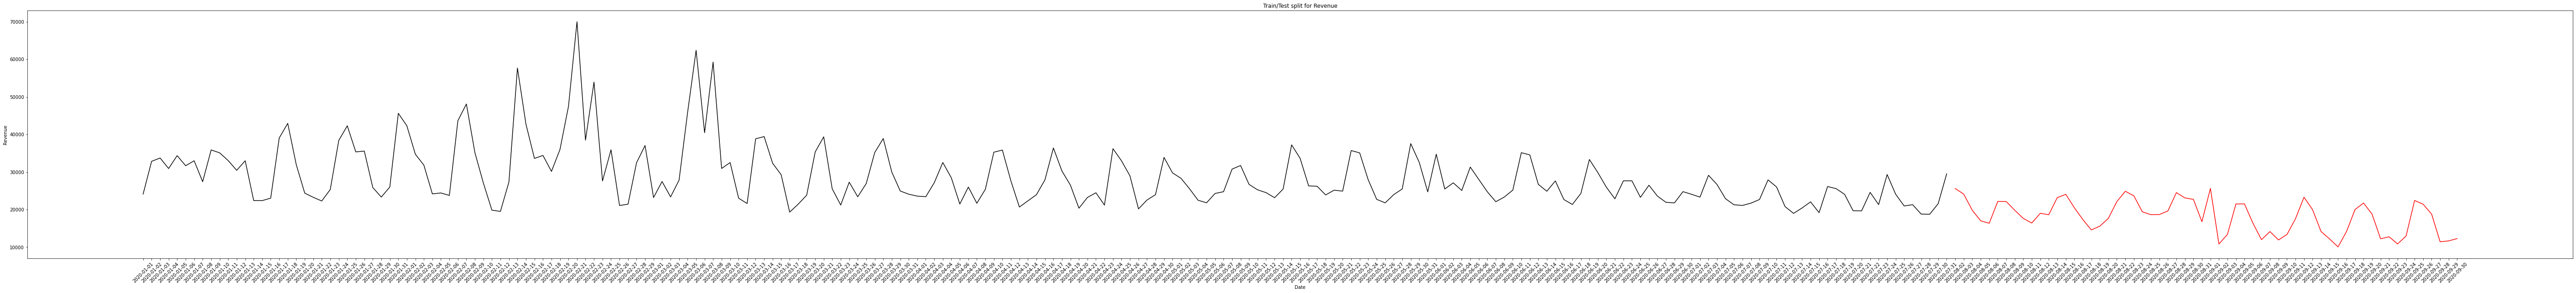

In [17]:
import matplotlib.pyplot as plt

train = cpc_users[pd.to_datetime(cpc_users.index, format='%Y-%m-%d') < pd.to_datetime("2020-08-01", format='%Y-%m-%d')]
test = cpc_users[pd.to_datetime(cpc_users.index, format='%Y-%m-%d') > pd.to_datetime("2020-08-01", format='%Y-%m-%d')]

train_to_plot = train.groupby(by='date', axis=0).mean()
test_to_plot = test.groupby(by='date', axis=0).mean()

plt.figure(figsize=(100,10))
plt.plot(train_to_plot.index, train_to_plot['revenue'], color='black' )
plt.plot(test_to_plot.index, test_to_plot['revenue'], color='red' )

plt.ylabel('Revenue')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Revenue")
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

x=cpc_users['revenue']
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it means data is stationary")
else:
    print("Reject the null hypotheise , it means data is not stationary")

ADF Stataics  -0.3409340846338934
p-value 0.9195034301081686
critical values 5108.40265628473
Reject the null hypotheise , it means data is not stationary


In [19]:
cpc_users['revenue first difference']=cpc_users['revenue']-cpc_users['revenue'].shift(1)

<AxesSubplot:xlabel='date'>

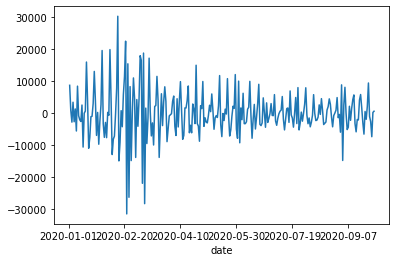

In [20]:
cpc_users['revenue first difference'].plot()

In [21]:
x=cpc_users['revenue first difference'].dropna() 
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it means data is stationary")
else:
    print("Reject the null hypotheise , it means data is not stationary")

ADF Stataics  -8.33245363150421
p-value 3.340157873996763e-13
critical values 5081.999193268992
fail to reject null hypothese h1 , it means data is stationary


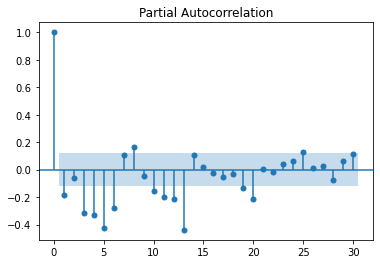

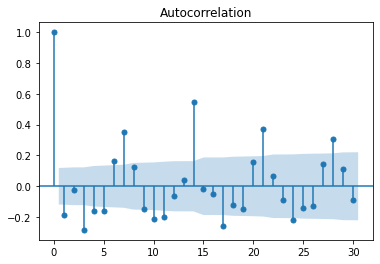

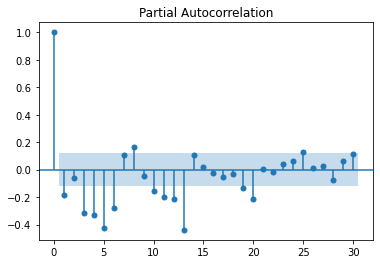

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(cpc_users['revenue first difference'].iloc[1:],lags=30)
plot_pacf(cpc_users['revenue first difference'].iloc[1:],lags=30)

In [23]:
train = cpc_users[pd.to_datetime(cpc_users.index, format='%Y-%m-%d') < pd.to_datetime("2020-08-01", format='%Y-%m-%d')]
test = cpc_users[pd.to_datetime(cpc_users.index, format='%Y-%m-%d') > pd.to_datetime("2020-08-01", format='%Y-%m-%d')]

train_to_plot = train.groupby(by='date', axis=0).mean()
test_to_plot = test.groupby(by='date', axis=0).mean()

In [24]:
train_to_plot

,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,date_corona,date_week,CR,revenue first difference
date,,,,,,,,,,,
2020-01-01,436.792453,149.396226,1053.207547,210.490566,141.698113,20.660377,24129.471698,0.0,0.0,38.900913,NaN
2020-01-02,574.777778,195.148148,1353.888889,270.555556,181.629630,27.944444,32854.370370,0.0,0.0,50.139340,8724.898672
2020-01-03,557.982143,188.160714,1325.357143,264.821429,176.107143,27.928571,33734.142857,0.0,0.0,47.217832,879.772487
2020-01-04,502.208955,168.134328,1214.776119,242.746269,155.641791,25.402985,30931.761194,0.0,1.0,50.012152,-2802.381663
2020-01-05,557.916667,185.816667,1326.500000,265.133333,176.816667,28.383333,34363.900000,0.0,1.0,43.908449,3432.138806
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,354.803571,116.785714,941.250000,188.178571,187.392857,15.035714,21308.125000,1.0,0.0,36.480959,335.370614
2020-07-28,354.654545,119.145455,889.090909,177.745455,179.636364,14.672727,18806.381818,1.0,0.0,33.296126,-2501.743182
2020-07-29,357.245614,121.192982,911.403509,182.280702,184.122807,14.438596,18765.771930,1.0,0.0,34.993911,-40.609888


E:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
E:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
E:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
E:\anaconda2\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE:  5661.012368457737


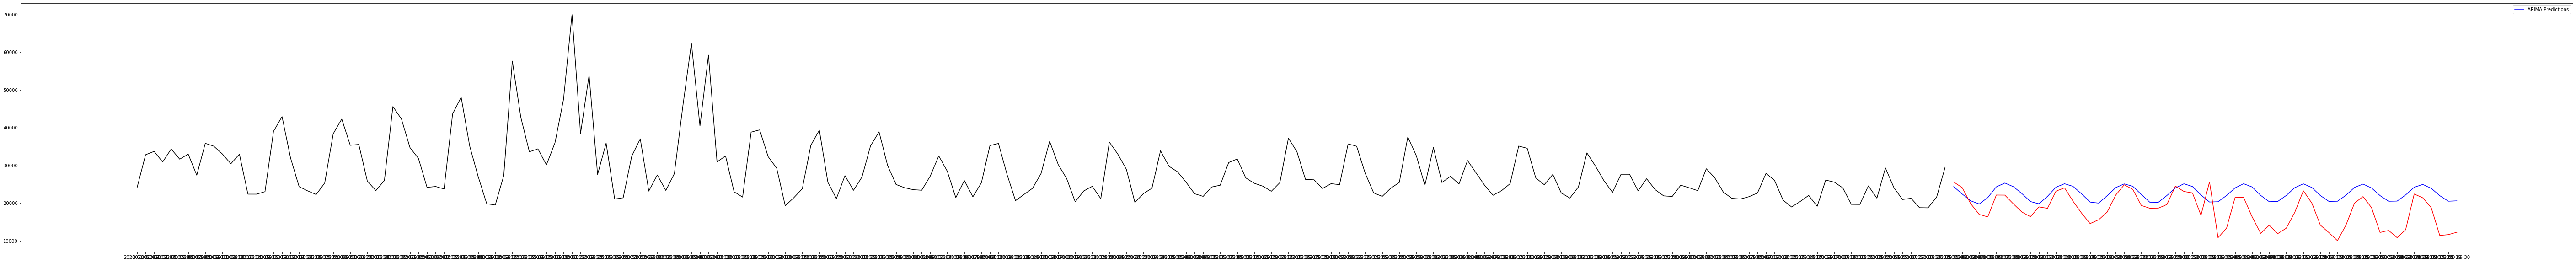

In [26]:
from statsmodels.tsa.arima.model import ARIMA

y = train_to_plot['revenue']
ARIMAmodel = ARIMA(y, order = (4, 1, 5))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test_to_plot.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test_to_plot.index
y_pred_out = y_pred_df["Predictions"] 

plt.figure(figsize=(100,10))
plt.plot(train_to_plot.index, train_to_plot['revenue'], color='black' )
plt.plot(y_pred_out, color='blue', label = 'ARIMA Predictions')
plt.plot(test_to_plot.index, test_to_plot['revenue'], color='red' )
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test_to_plot["revenue"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

E:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
E:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
E:\anaconda2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
E:\anaconda2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\anaconda2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal mo

RMSE:  4465.013705587979


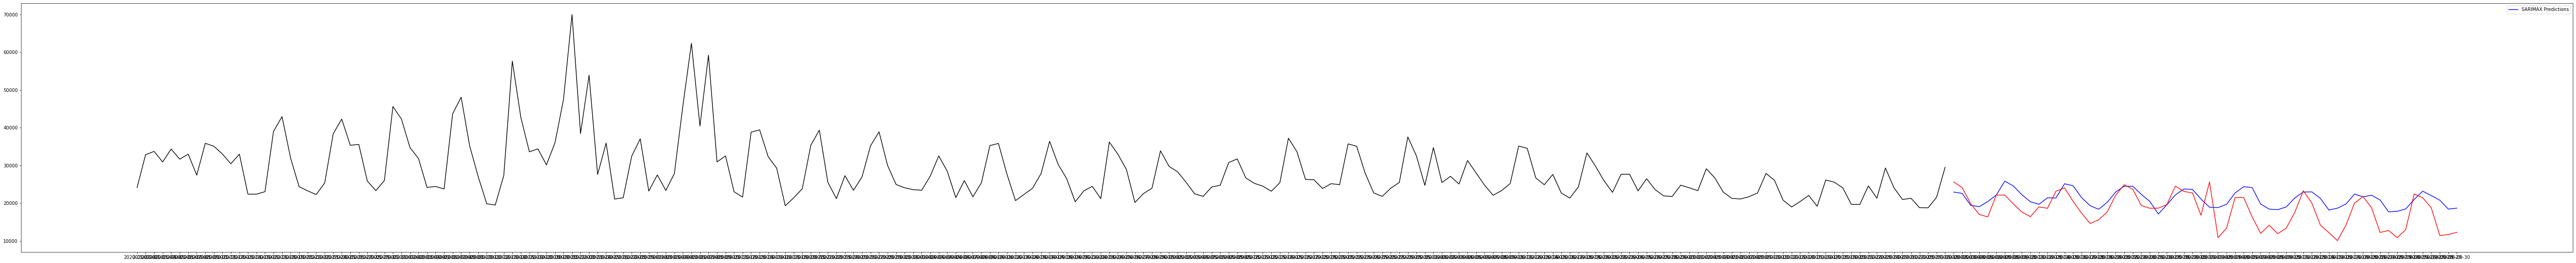

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMAXmodel = SARIMAX(y, order = (4, 1, 5), seasonal_order=(4,1,5,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test_to_plot.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test_to_plot.index
y_pred_out = y_pred_df["Predictions"] 

plt.figure(figsize=(100,10))
plt.plot(train_to_plot.index, train_to_plot['revenue'], color='black' )
plt.plot(y_pred_out, color='blue', label = 'SARIMAX Predictions')
plt.plot(test_to_plot.index, test_to_plot['revenue'], color='red' )
plt.legend()

sarimax_rmse = np.sqrt(mean_squared_error(test_to_plot["revenue"].values, y_pred_df["Predictions"]))
print("RMSE: ", sarimax_rmse)

In [29]:
import datetime
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("2020-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(days=x) for x in range(0,360)]
future_prediction = pd.DataFrame(index=date_list, columns= data.columns)
data_1 = pd.concat([cpc_users, future_prediction])

In [30]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(data_1['revenue'],order=(4, 1, 5), seasonal_order=(4,1,5,12))
result=model.fit()

E:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
E:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
E:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
E:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A

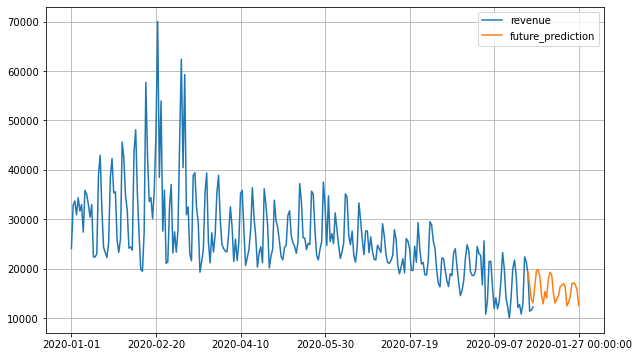

In [31]:
data_1['future_prediction']=result.predict(start=270, end=300, dynamic=True)
data_1[['revenue','future_prediction']].plot(figsize=(10, 6))
plt.grid(True)